### Exercício 6: Completa as implementações dos modelos RidgeRegression e LogisticRegression

#### Realiza um gráfico (line plot) que permita visualizar o comportamento do custo em função do número de iterações.

In [40]:
# -*- coding: utf-8 -*-

# modules
import sys
sys.path.insert(0, r'C:\Users\Asus\Desktop\Bioinformática\2º Ano\1º Semestre\Sistemas inteligentes\si\src\si')
sys.path.insert(0, r'C:\Users\Asus\Desktop\Bioinformática\2º Ano\1º Semestre\Sistemas inteligentes\si\src\si\io')

from linear_model.ridge_regression import RidgeRegression
from linear_model.logistic_regression import LogisticRegression
from model_selection.split import train_test_split
from csv1 import read_csv
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

### Modelo RidgeRegression

In [41]:
path = r'C:\Users\Asus\Desktop\Bioinformática\2º Ano\1º Semestre\Sistemas inteligentes\si\datasets\cpu.csv'
cpu = read_csv(path, sep = ",", features = True, label = True)

In [42]:
cpu.X = StandardScaler().fit_transform(cpu.X) #normalize data
train, test = train_test_split(cpu, test_size = 0.2, random_state = 42) #split the data 

#### Regular fit

In [43]:
ridge = RidgeRegression(use_adaptive_alpha = False, max_iter = 2000)
ridge.fit(train)

In [44]:
print(f'Predictions: {ridge.predict(test)}')
print(f'Score: {ridge.score(test)}')
print(f'Cost: {ridge.cost(test)}')

Predictions: [128.26453523 -15.65693537 -10.02502879 574.36226915 -12.31507769
 253.64791387  21.21110488 -28.14456071 763.50700723 256.32487007
  87.12304095 103.35873423  23.8228405   24.77754089  64.92402347
   9.65085393 120.30651647  -1.29310913 161.76737614  85.08005687
  51.11614466  27.99404714 127.61448727 -21.64761761 -41.65875749
  16.50940913 -27.80634248   2.37414919  -3.61143797  59.12954555
 255.32553266  21.09183392   2.6752332  -19.0916076  -33.13838134
  24.14101178  10.6337403  350.28653503 151.57111915 -12.18611573
 420.55222382]
Score: 4635.928999312795
Cost: 4704.195052183106


Text(0.5, 1.0, 'Cost of RidgeRegression (Regular Fit)')

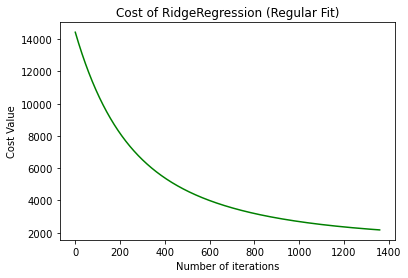

In [45]:
#Plot of the cost
plt.plot(list(ridge.cost_history.keys()), list(ridge.cost_history.values()), color = "green")
plt.xlabel('Number of iterations')
plt.ylabel('Cost Value')
plt.title('Cost of RidgeRegression (Regular Fit)')

#### Adaptive fit

In [46]:
ridge2 = RidgeRegression(use_adaptive_alpha = True, max_iter = 2000)
ridge2.fit(train)

In [47]:
print(f'Predictions: {ridge2.predict(test)}')
print(f'Score: {ridge2.score(test)}')
print(f'Cost: {ridge2.cost(test)}')

Predictions: [128.27301374 -15.64097231 -10.0056978  574.46429684 -12.27816508
 253.69736758  21.22924844 -28.13117148 763.62109488 256.36112325
  87.14728343 103.38658408  23.84308164  24.7938249   64.95374535
   9.6693786  120.3239081   -1.28075496 161.80076503  85.107016
  51.14335042  28.01471497 127.64164662 -21.61059605 -41.62542547
  16.52786704 -27.78956835   2.386552    -3.59878629  59.15139999
 255.37155179  21.10797809   2.69012049 -19.08163949 -33.11298223
  24.15773159  10.66127252 350.34488877 151.61811038 -12.17423321
 420.58504037]
Score: 4633.694566456488
Cost: 4701.980492240861


Text(0.5, 1.0, 'Cost of RidgeRegression (Adaptive Fit)')

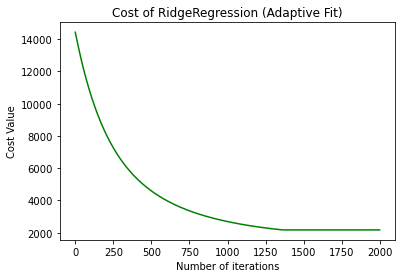

In [48]:
#Plot of the cost
plt.plot(list(ridge2.cost_history.keys()), list(ridge2.cost_history.values()), color = "green")
plt.xlabel('Number of iterations')
plt.ylabel('Cost Value')
plt.title('Cost of RidgeRegression (Adaptive Fit)')

### Modelo LogisticRegression

In [49]:
path = r'C:\Users\Asus\Desktop\Bioinformática\2º Ano\1º Semestre\Sistemas inteligentes\si\datasets\breast-bin.csv'
breast = read_csv(path, sep = ",", features = False, label = True)

In [50]:
breast.X = StandardScaler().fit_transform(breast.X) 
train, test = train_test_split(breast, test_size = 0.2, random_state = 42) 

#### Regular fit

In [51]:
log = LogisticRegression(use_adaptive_alpha = False, max_iter = 2000)
log.fit(train)  

In [52]:
print(f"Predictions: {log.predict(test)}")
print(f"Score: {log.score(test)}")
print(f"Cost: {log.cost(test)}")

Predictions: [1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1.
 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0.
 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0.
 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0.
 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1.]
Score: 0.9856115107913669
Cost: 0.2395076287551021


Text(0.5, 1.0, 'Cost of LogisticRegression (Regular fit)')

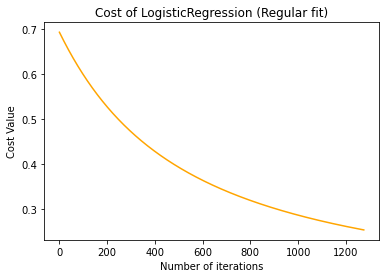

In [53]:
#Plot of the cost
plt.plot(list(log.cost_history.keys()), list(log.cost_history.values()), color = "orange")
plt.xlabel('Number of iterations')
plt.ylabel('Cost Value')
plt.title("Cost of LogisticRegression (Regular fit)")

#### Adaptive fit

In [54]:
log2 = LogisticRegression(use_adaptive_alpha = True, max_iter = 2000)
log2.fit(train)  

In [55]:
print(f"Predictions: {log2.predict(test)}")
print(f"Score: {log2.score(test)}")
print(f"Cost: {log2.cost(test)}")

Predictions: [1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1.
 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0.
 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0.
 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0.
 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1.]
Score: 0.9856115107913669
Cost: 0.23940250104550925


Text(0.5, 1.0, 'Cost of LogisticRegression (Adaptive fit)')

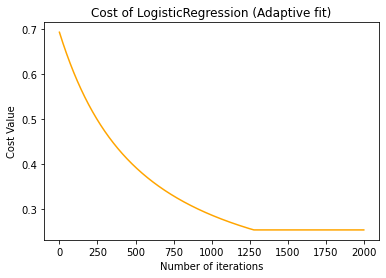

In [56]:
#Plot of the cost
plt.plot(list(log2.cost_history.keys()), list(log2.cost_history.values()), color = "orange")
plt.xlabel('Number of iterations')
plt.ylabel('Cost Value')
plt.title("Cost of LogisticRegression (Adaptive fit)")